In [3]:
"""
plot classification probability for different classifiers, using the 3-class Iris dataset,using 
(1) SVM classifier, 
(2) L1 and L2 penalized logistic regression with one-vs-rest (single-class!)/ multinomial setting, and
(3) Gaussian process classification

"""
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF #sq exp kernel
from sklearn import datasets


In [12]:
iris = datasets.load_iris()
X = iris.data[:,0:2] 
y = iris.target

In [13]:
#number of features
n_features = X.shape[1]

C=10
kernel = 1.0 * RBF([1.0,1.0]) #for GPC

#create different classifiers
"""
OvR scheme if multi_class = 'ovr', cross-entropy less if 'multinomial'
solvers = lbfgs,sag,saga,newton-cg
penalty = specifies norm
C = inverse of regularization norm
"""

#
classifiers = {
    #saga supports l2 regularisation
    'L1 logisitic':LogisticRegression(C=C,penalty='l1',
                                     solver='saga',
                                     multi_class='multinomial',
                                     max_iter=10000),
    'L2 logistic (Multinomial)':LogisticRegression(C=C,penalty='l2',
                                                  solver='saga',
                                                  multi_class='multinomial',
                                                  max_iter=10000),
    'L2 logistic (OvR)':LogisticRegression(C=C,penalty='l2',
                                          solver='saga',
                                          multi_class='ovr',
                                          max_iter=10000),

    #multiclass supported by one-vs-all,C - regularization
    'Linear SVC':SVC(kernel='linear',C=C,probability=True,random_state=0),
    'GPC':GaussianProcessClassifier(kernel)   
}

In [21]:
n_classifiers = len(classifiers)

plt.figure(figsize=(3*2,n_classifiers*2))
plt.subplots_adjust(bottom=.2,top=.85) #adjust subplot parameters

<Figure size 432x720 with 0 Axes>

Accuracy (train) for L1 logisitic: 83.3%
Accuracy (train) for L2 logistic (Multinomial): 82.7%
Accuracy (train) for L2 logistic (OvR): 79.3%
Accuracy (train) for Linear SVC: 82.0%
Accuracy (train) for GPC: 82.7%


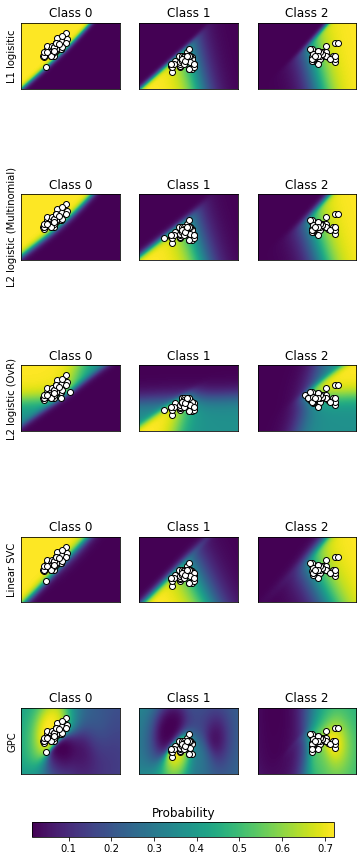

In [29]:
xx = np.linspace(3,9,100) #numpy.linspace returns evenly spaced numbers over specified intervals (start,stop,num_samples)
yy = np.linspace(1,5,100).T

xx,yy = np.meshgrid(xx,yy)
Xfull = np.c_[xx.ravel(),yy.ravel()] #column stack

for index,(name,classifier) in enumerate(classifiers.items()):
    classifier.fit(X,y)
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y,y_pred)
    print('Accuracy (train) for %s: %0.1f%%'%(name,accuracy*100))
    
    #view probabilities
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers,n_classes,index*n_classes + k + 1)
        plt.title("Class %d"%k)
        if k==0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:,k].reshape((100,100)),
                                  extent=(3,9,1,5),origin='lower')
        plt.xticks(())
        plt.yticks(())
        
        idx = (y_pred==k)
        if idx.any():
            plt.scatter(X[idx,0],X[idx,1],marker='o',c='w',edgecolor='k')
            
ax = plt.axes([0.15,0.04,0.7,0.05])
plt.title('Probability')
plt.colorbar(imshow_handle,cax=ax,orientation='horizontal')

plt.subplots_adjust(top=3)

plt.show()